In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Query that was used in Sql Server

In [ ]:
#  ALTER TABLE [AdventureWorks2014FullForAzure].[Production].[TransactionHistoryArchive]
#  ADD FinalPrice float;

#  UPDATE [AdventureWorks2014FullForAzure].[Production].[TransactionHistoryArchive]
#  SET FinalPrice = [Quantity] * [ActualCost];

#  select 
#  year(TransactionDate) as Years,
#  month(TransactionDate) as Months,
#  day(TransactionDate) as Days,
#  sum(Quantity) as Quantity,
#  sum(FinalPrice) as TotalPrice
#  from [AdventureWorks2014FullForAzure].[Production].[TransactionHistoryArchive]
#  group by year(TransactionDate),day(TransactionDate),month(TransactionDate)
#  order by Years ,Months, Days;

# Data Preparation

In [352]:
df = pd.read_csv("SqlServerData.csv",sep = ";")

In [353]:
df

,Years,Months,Days,Quantity,TotalPrice
0,2011,4,16,563,"9491,518"
1,2011,4,30,2765,"94404,303"
2,2011,5,31,825,"602047,927"
3,2011,6,1,4,"13931,52"
4,2011,6,2,5,"15012,1782"
...,...,...,...,...,...
789,2013,7,26,1174,"16562,79"
790,2013,7,27,922,"29636,85"
791,2013,7,28,1121,"33871,06"
792,2013,7,29,530,"30886,4900000001"


In [354]:
df.isnull().sum()

Years         0
Months        0
Days          0
Quantity      0
TotalPrice    0
dtype: int64

In [355]:
df.dtypes

Years          int64
Months         int64
Days           int64
Quantity       int64
TotalPrice    object
dtype: object

In [356]:
df['TotalPrice'] = df['TotalPrice'].str.replace(',', '.')

In [357]:
df['TotalPrice'] = df['TotalPrice'].astype('float64')

In [358]:
df.isnull().sum()

Years         0
Months        0
Days          0
Quantity      0
TotalPrice    0
dtype: int64

In [359]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['TotalPrice_scaled'] = scaler.fit_transform(df[['TotalPrice']])

In [360]:
df

,Years,Months,Days,Quantity,TotalPrice,TotalPrice_scaled
0,2011,4,16,563,9491.5180,0.001737
1,2011,4,30,2765,94404.3030,0.017280
2,2011,5,31,825,602047.9270,0.110200
3,2011,6,1,4,13931.5200,0.002550
4,2011,6,2,5,15012.1782,0.002748
...,...,...,...,...,...,...
789,2013,7,26,1174,16562.7900,0.003032
790,2013,7,27,922,29636.8500,0.005425
791,2013,7,28,1121,33871.0600,0.006200
792,2013,7,29,530,30886.4900,0.005654


In [361]:
df['Date'] = pd.to_datetime(df[['Years', 'Months', 'Days']])

In [362]:
df.set_index('Date', inplace=True)

In [363]:
df

,Years,Months,Days,Quantity,TotalPrice,TotalPrice_scaled
Date,,,,,,
2011-04-16,2011,4,16,563,9491.5180,0.001737
2011-04-30,2011,4,30,2765,94404.3030,0.017280
2011-05-31,2011,5,31,825,602047.9270,0.110200
2011-06-01,2011,6,1,4,13931.5200,0.002550
2011-06-02,2011,6,2,5,15012.1782,0.002748
...,...,...,...,...,...,...
2013-07-26,2013,7,26,1174,16562.7900,0.003032
2013-07-27,2013,7,27,922,29636.8500,0.005425
2013-07-28,2013,7,28,1121,33871.0600,0.006200


In [364]:
df_resampled = df.resample('M').sum()

In [365]:
df_resampled

,Years,Months,Days,Quantity,TotalPrice,TotalPrice_scaled
Date,,,,,,
2011-04-30,4022,8,46,3328,1.038958e+05,0.019017
2011-05-31,2011,5,31,825,6.020479e+05,0.110200
2011-06-30,60330,180,465,27977,4.589108e+05,0.084000
2011-07-31,62341,217,496,63779,2.359999e+06,0.431978
2011-08-31,62341,248,496,49528,2.903150e+06,0.531397
2011-09-30,60330,270,465,41693,5.020738e+05,0.091900
2011-10-31,62341,310,496,97632,5.407454e+06,0.989788
2011-11-30,60330,330,465,71894,7.378398e+05,0.135055
2011-12-31,62341,372,496,51303,1.752577e+06,0.320794


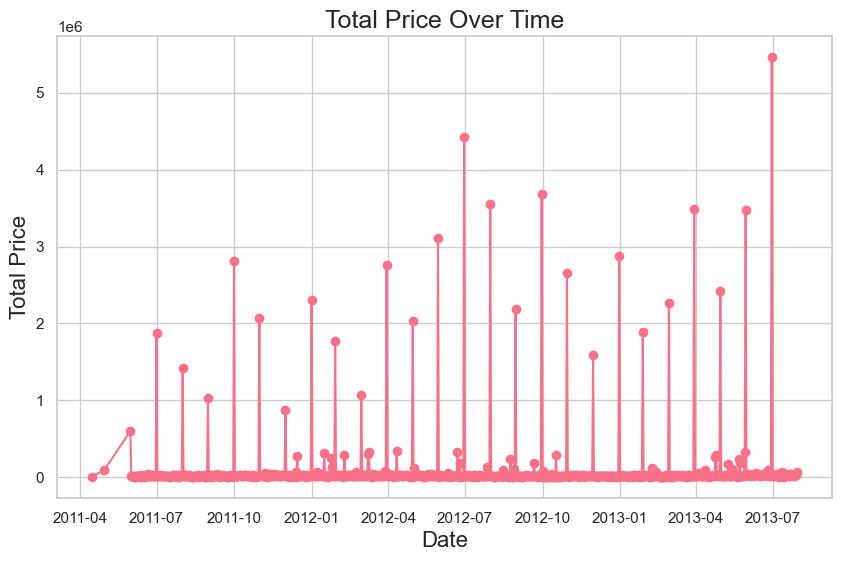

In [366]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['TotalPrice'], marker='o')
plt.title('Total Price Over Time')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.grid(True)
plt.show()

# Forecasting with Decomposition

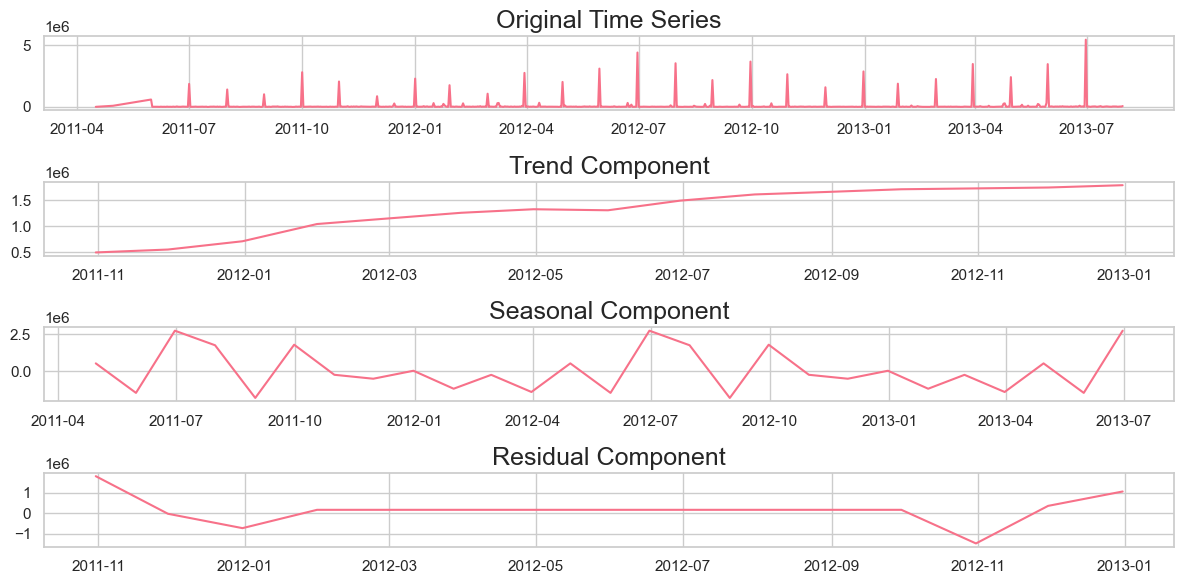

In [367]:
# Perform seasonal decomposition
result = seasonal_decompose(df['TotalPrice'].asfreq('M') , model='additive')

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.subplot(4, 1, 1)
plt.plot(df.index, df['TotalPrice'])
plt.title('Original Time Series')

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend Component')

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal Component')

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [368]:
# Obtain trend and seasonality components
trend = result.trend
seasonal = result.seasonal

In [369]:
trend

Date
2011-04-30             NaN
2011-05-31             NaN
2011-06-30             NaN
2011-07-31             NaN
2011-08-31             NaN
2011-09-30             NaN
2011-10-31    4.965507e+05
2011-11-30    5.523336e+05
2011-12-31    7.109403e+05
2012-01-31    1.041428e+06
2012-02-29    1.146148e+06
2012-03-31    1.257127e+06
2012-04-30    1.324868e+06
2012-05-31    1.304977e+06
2012-06-30    1.489828e+06
2012-07-31    1.608614e+06
2012-08-31    1.657976e+06
2012-09-30    1.707981e+06
2012-10-31    1.724416e+06
2012-11-30    1.741565e+06
2012-12-31    1.785927e+06
2013-01-31             NaN
2013-02-28             NaN
2013-03-31             NaN
2013-04-30             NaN
2013-05-31             NaN
2013-06-30             NaN
Freq: M, Name: trend, dtype: float64

In [370]:
seasonal

Date
2011-04-30    5.337556e+05
2011-05-31   -1.473664e+06
2011-06-30    2.757177e+06
2011-07-31    1.766665e+06
2011-08-31   -1.817900e+06
2011-09-30    1.803422e+06
2011-10-31   -2.428246e+05
2011-11-30   -5.103821e+05
2011-12-31    3.183841e+04
2012-01-31   -1.190717e+06
2012-02-29   -2.454842e+05
2012-03-31   -1.411887e+06
2012-04-30    5.337556e+05
2012-05-31   -1.473664e+06
2012-06-30    2.757177e+06
2012-07-31    1.766665e+06
2012-08-31   -1.817900e+06
2012-09-30    1.803422e+06
2012-10-31   -2.428246e+05
2012-11-30   -5.103821e+05
2012-12-31    3.183841e+04
2013-01-31   -1.190717e+06
2013-02-28   -2.454842e+05
2013-03-31   -1.411887e+06
2013-04-30    5.337556e+05
2013-05-31   -1.473664e+06
2013-06-30    2.757177e+06
Freq: M, Name: seasonal, dtype: float64

In [398]:
# Forecasting horizon
forecast_horizon = 24  # Number of periods to forecast

In [399]:
# Generate future index for forecasting
future_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_horizon, freq='M')

In [486]:
# Generate forecasted values using trend and seasonality
forecasted_values = trend[-forecast_horizon:] + seasonal[-forecast_horizon:]

In [488]:
forecasted_values

Date
2011-07-31             NaN
2011-08-31             NaN
2011-09-30             NaN
2011-10-31    2.537261e+05
2011-11-30    4.195153e+04
2011-12-31    7.427787e+05
2012-01-31   -1.492881e+05
2012-02-29    9.006634e+05
2012-03-31   -1.547604e+05
2012-04-30    1.858624e+06
2012-05-31   -1.686868e+05
2012-06-30    4.247005e+06
2012-07-31    3.375279e+06
2012-08-31   -1.599248e+05
2012-09-30    3.511403e+06
2012-10-31    1.481591e+06
2012-11-30    1.231183e+06
2012-12-31    1.817766e+06
2013-01-31             NaN
2013-02-28             NaN
2013-03-31             NaN
2013-04-30             NaN
2013-05-31             NaN
2013-06-30             NaN
Freq: M, dtype: float64

In [489]:
i = forecasted_values.index
i = list(i)
v = forecasted_values.values
v = list(v)
v

[nan,
 nan,
 nan,
 253726.14512117798,
 41951.52991909976,
 742778.7081378449,
 -149288.12985173543,
 900663.4245482646,
 -154760.41445173533,
 1858624.0165482645,
 -168686.77445173543,
 4247004.543748254,
 3375279.1068482446,
 -159924.83915173542,
 3511402.693848254,
 1481591.1130753413,
 1231182.8146774294,
 1817765.875058674,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [495]:
data = {'Date': i, 'Column': v}
for_df = pd.DataFrame(data)
for_df
new_column_name = 'TotalPrice'
for_df.rename(columns={for_df.columns[1]: new_column_name}, inplace=True)
for_df.set_index('Date', inplace=True)
df_filled = for_df.fillna(for_df.mean())
df_filled
forecasted_values = list(df_filled.values)
forecasted_values = df_filled['TotalPrice']

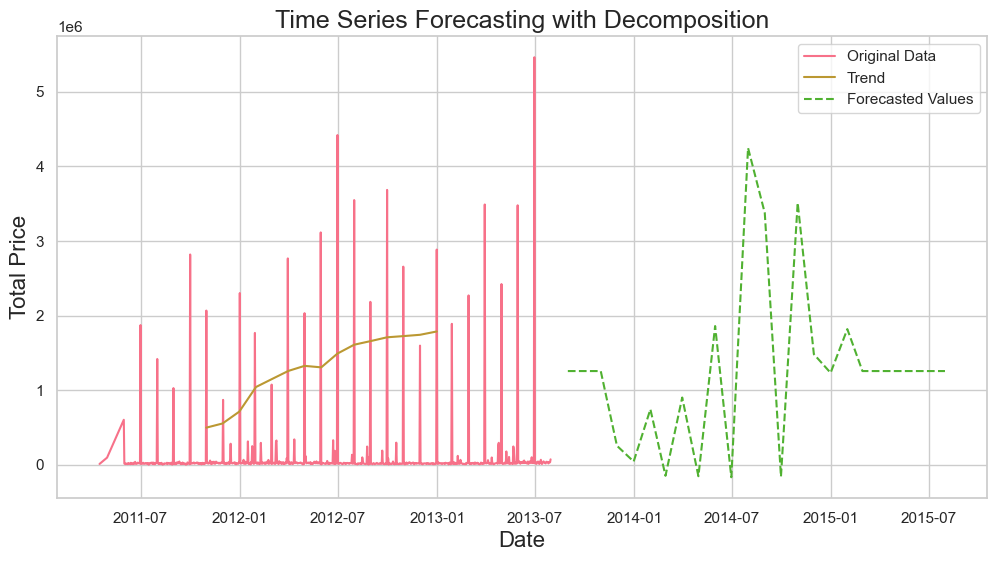

In [498]:
# Plot the original data, trend, and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['TotalPrice'], label='Original Data')
plt.plot(trend.index, trend, label='Trend')
plt.plot(future_index, forecasted_values, label='Forecasted Values', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.title('Time Series Forecasting with Decomposition')
plt.legend()
plt.grid(True)
plt.show()

# Anomaly Detection

In [499]:
# Calculate residuals (observed - forecasted)
residuals = df['TotalPrice'].iloc[-forecast_horizon:].values - forecasted_values
residuals

Date
2011-07-31   -1.214237e+06
2011-08-31   -1.218785e+06
2011-09-30   -1.246030e+06
2011-10-31   -2.302842e+05
2011-11-30   -2.972650e+03
2011-12-31   -6.772289e+05
2012-01-31    1.716431e+05
2012-02-29   -8.917279e+05
2012-03-31    1.794793e+05
2012-04-30   -1.827896e+06
2012-05-31    2.125079e+05
2012-06-30   -4.214472e+06
2012-07-31   -3.352431e+06
2012-08-31    1.821332e+05
2012-09-30   -3.494820e+06
2012-10-31   -1.443753e+06
2012-11-30   -1.192788e+06
2012-12-31   -1.783689e+06
2013-01-31   -1.221842e+06
2013-02-28   -1.238725e+06
2013-03-31   -1.225650e+06
2013-04-30   -1.221416e+06
2013-05-31   -1.224401e+06
2013-06-30   -1.184122e+06
Name: TotalPrice, dtype: float64

In [502]:
import numpy as np
# Calculate mean and standard deviation of residuals
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

In [503]:
# Set a threshold for anomaly detection (e.g., 2 standard deviations)
anomaly_threshold = 2 * std_residual

In [504]:
# Detect anomalies
anomalies = residuals[abs(residuals) > anomaly_threshold]
anomalies

Date
2012-06-30   -4.214472e+06
2012-07-31   -3.352431e+06
2012-09-30   -3.494820e+06
Name: TotalPrice, dtype: float64

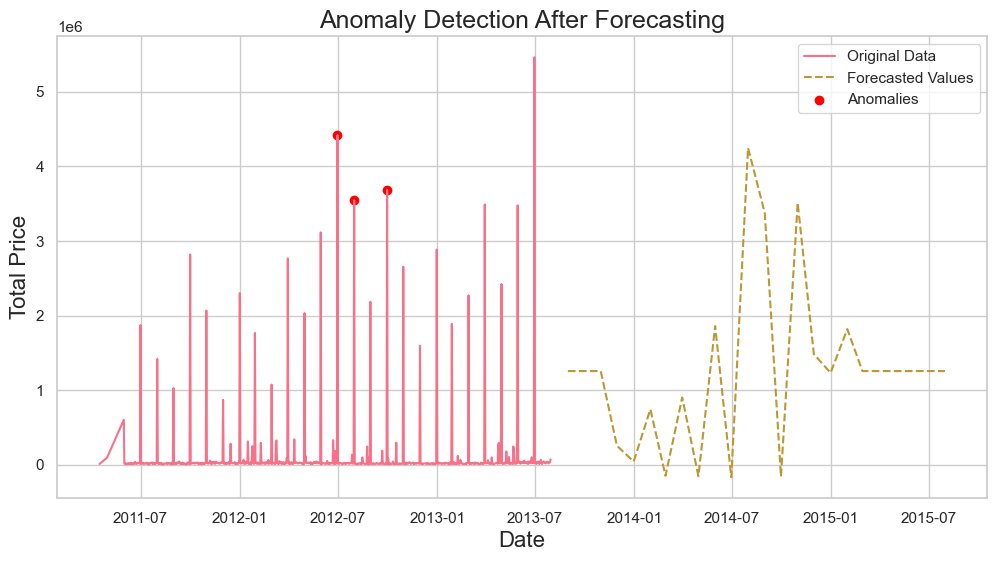

Detected Anomalies:
Date
2012-06-30   -4.214472e+06
2012-07-31   -3.352431e+06
2012-09-30   -3.494820e+06
Name: TotalPrice, dtype: float64


In [505]:

# Plot the original data, forecasted values, and anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['TotalPrice'], label='Original Data')
plt.plot(future_index, forecasted_values, label='Forecasted Values', linestyle='dashed')
plt.scatter(anomalies.index, df['TotalPrice'].loc[anomalies.index], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.title('Anomaly Detection After Forecasting')
plt.legend()
plt.grid(True)
plt.show()

print("Detected Anomalies:")
print(anomalies)

# Modelling

In [506]:
# ARIMA Model
p = 1  # AR order
d = 1  # Integration order (to make the series stationary)
q = 1  # MA order

In [507]:
# Fit ARIMA model to residuals
from statsmodels.tsa.arima.model import ARIMA  
model = ARIMA(residuals, order=(p, d, q))
model_fit = model.fit()

C:\Users\Riyad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Riyad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Riyad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [508]:
forecast_residuals = model_fit.forecast(steps=forecast_horizon)

In [517]:
# Calculate adjusted forecasted values
adjusted_forecasted_values = forecasted_values.values + forecast_residuals.values
adjusted_forecasted_values

array([  -12631.94223186,    13436.43562978,     5326.90732929,
        -993711.50123363, -1206270.91602349,  -505199.59701083,
       -1397342.38397921,  -347367.20285428, -1402798.39181658,
         610588.32565969, -1416723.1766329 ,  2998968.36284082,
        2127242.85710547, -1407961.06748074,  2263366.45885771,
         233554.88015711,   -16853.41888547,   569729.64169632,
           7251.08748352,     7251.08750293,     7251.08749689,
           7251.08749877,     7251.08749819,     7251.08749837])

In [518]:
# Create a DataFrame for the adjusted forecasted values
adjusted_forecast_df = pd.DataFrame({'TotalPrice': adjusted_forecasted_values}, index=future_index)

In [538]:
adjusted_forecast_df

,TotalPrice
2013-08-31,-1.263194e+04
2013-09-30,1.343644e+04
2013-10-31,5.326907e+03
2013-11-30,-9.937115e+05
2013-12-31,-1.206271e+06
2014-01-31,-5.051996e+05
2014-02-28,-1.397342e+06
2014-03-31,-3.473672e+05
2014-04-30,-1.402798e+06
2014-05-31,6.105883e+05


In [542]:
# Combine the original data and adjusted forecasted values
combined_df = pd.concat([df, adjusted_forecast_df])

In [543]:
combined_df

,Years,Months,Days,Quantity,TotalPrice,TotalPrice_scaled
2011-04-16,2011.0,4.0,16.0,563.0,9491.518000,0.001737
2011-04-30,2011.0,4.0,30.0,2765.0,94404.303000,0.017280
2011-05-31,2011.0,5.0,31.0,825.0,602047.927000,0.110200
2011-06-01,2011.0,6.0,1.0,4.0,13931.520000,0.002550
2011-06-02,2011.0,6.0,2.0,5.0,15012.178200,0.002748
...,...,...,...,...,...,...
2015-03-31,NaN,NaN,NaN,NaN,7251.087503,NaN
2015-04-30,NaN,NaN,NaN,NaN,7251.087497,NaN
2015-05-31,NaN,NaN,NaN,NaN,7251.087499,NaN
2015-06-30,NaN,NaN,NaN,NaN,7251.087498,NaN


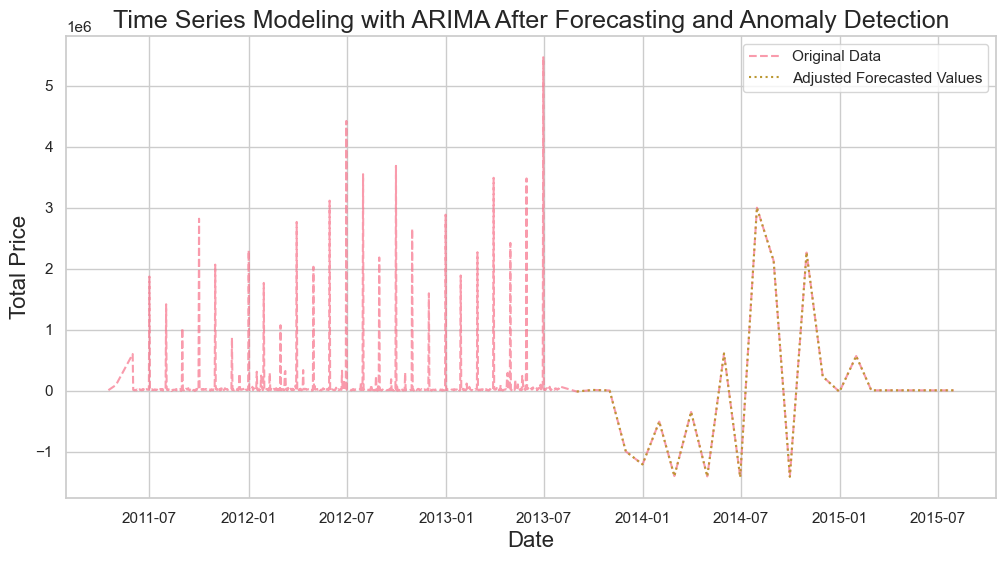

In [544]:
# Plot the original data, forecasted values, and adjusted forecasted values
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['TotalPrice'], label='Original Data', linestyle='dashed', alpha=0.7)
plt.plot(future_index, adjusted_forecasted_values, label='Adjusted Forecasted Values', linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.title('Time Series Modeling with ARIMA After Forecasting and Anomaly Detection')
plt.legend()
plt.grid(True)
plt.show()


# Model Evaluation

In [549]:
# Train-test split
train_size = int(0.8 * len(residuals))
train_data, test_data = residuals[:train_size], residuals[train_size:]

In [622]:
# Fit ARIMA model
order = (4, 1, 3)  # (p, d, q)
model = ARIMA(train_data, order=order)
fitted_model = model.fit() 

C:\Users\Riyad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Riyad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Riyad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Riyad\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Riyad\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

In [623]:
# Make predictions
forecast = fitted_model.forecast(steps=len(test_data))
forecast

2013-02-28   -1.278771e+06
2013-03-31   -1.406438e+06
2013-04-30   -1.117345e+06
2013-05-31   -1.325920e+06
2013-06-30   -1.160433e+06
Freq: M, Name: predicted_mean, dtype: float64

In [624]:
# Get confidence intervals
conf_int = fitted_model.get_forecast(steps=len(test_data)).conf_int()
conf_int

,lower TotalPrice,upper TotalPrice
2013-02-28,-2.624894e+06,67351.521707
2013-03-31,-2.751557e+06,-61319.495915
2013-04-30,-2.480926e+06,246235.709099
2013-05-31,-2.821112e+06,169271.756674
2013-06-30,-2.658769e+06,337902.593910


In [625]:
# Evaluate model
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100

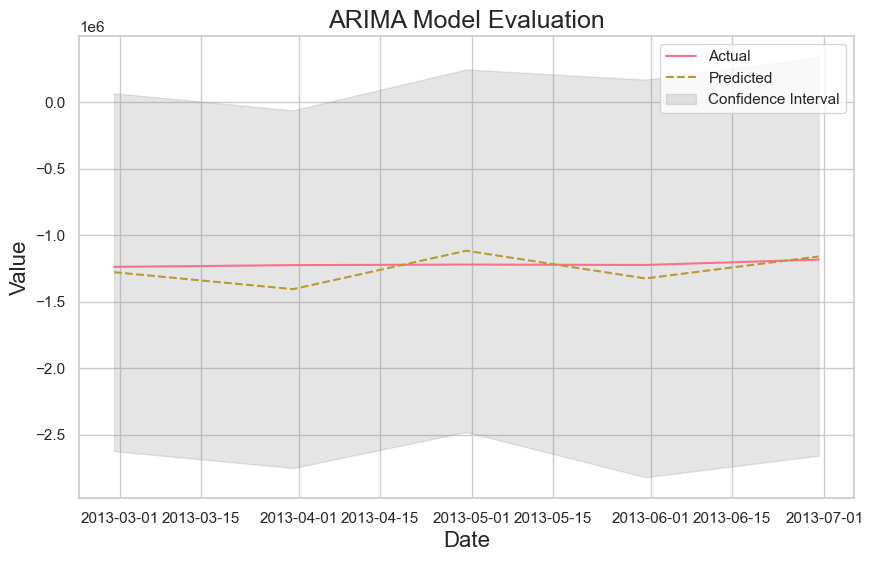

In [626]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted', linestyle='dashed')
plt.fill_between(test_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model Evaluation')
plt.legend()
plt.show()

In [627]:
# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 11197210327.1908
Mean Absolute Error (MAE): 90022.6686
Root Mean Squared Error (RMSE): 105816.8717
Mean Absolute Percentage Error (MAPE): 7.36%
